In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 

In [2]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=COBR.LON&outputsize=full&apikey=EUWPYIBX33PPD5U5'
r = requests.get(url)
data = r.json()
print(data)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'COBR.LON', '3. Last Refreshed': '2021-11-05', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2021-11-05': {'1. open': '1.99', '2. high': '1.99', '3. low': '1.825', '4. close': '1.99', '5. adjusted close': '1.99', '6. volume': '1127425', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2021-11-04': {'1. open': '1.9', '2. high': '2.091', '3. low': '1.812', '4. close': '2.0', '5. adjusted close': '2.0', '6. volume': '1721064', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2021-11-03': {'1. open': '1.9', '2. high': '1.93', '3. low': '1.806', '4. close': '1.9', '5. adjusted close': '1.9', '6. volume': '615594', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2021-11-02': {'1. open': '1.85', '2. high': '1.935', '3. low': '1.8', '4. close': '1.9', '5. adjusted close': '1.9', '6. volume': '2008484', '7. d

- data数据是一个大字典，只需要层层引用，加上.key()和.items()就能得到相应数据。不需要regex

In [3]:
dates = list(data['Time Series (Daily)'].keys())
len(dates)

537

In [4]:
close = []
for i in range(0, len(dates)):
    close.append(float(list(data['Time Series (Daily)'].items())[i][1]['4. close']))
print(len(close))

537


In [5]:
volume = []
for i in range(0, len(dates)):
    volume.append(float(list(data['Time Series (Daily)'].items())[i][1]['6. volume']))
print(len(volume))

537


In [6]:
cobr = pd.DataFrame({'cobr_dates':dates, 'cobr_close':close, 'cobr_volume':volume})
cobr[:5]

,cobr_dates,cobr_close,cobr_volume
0,2021-11-05,1.99,1127425.0
1,2021-11-04,2.00,1721064.0
2,2021-11-03,1.90,615594.0
3,2021-11-02,1.90,2008484.0
4,2021-11-01,1.85,942824.0


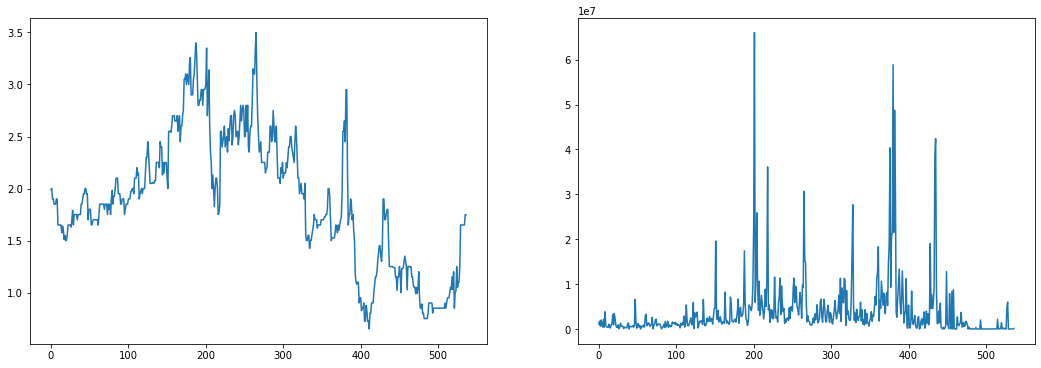

In [7]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(cobr.index, cobr.cobr_close)
ax2.plot(cobr.index, cobr.cobr_volume)
plt.show()


In [8]:
from datetime import date
today = str(date.today())
print(today)  

2021-11-08


In [9]:
# cobr.to_csv(r'/Users/paxton615/Desktop/cobr_{}.csv'.format(str(date.today())))
cobr.to_csv(r'/Users/paxton615/Desktop/cobr.csv')

In [10]:
!pwd

/Users/paxton615/Github_Personal/Notes/Notes/Client_stats
